# Rossmann Drug Store Chain Sales Prediction

## 1. Problem Definition
Rossmann is Germany's second-largest drug store chain. We have been provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. The goal of this notebook would be to create a model that would forecast the **sales** by using only the below inputs:
* Store
* DayOfWeek
* Date
* Customers
* Open
* Promo
* StateHoliday
* SchoolHoliday

![Drug](https://images.unsplash.com/photo-1631549916768-4119b2e5f926?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1179&q=80)

## 2. Datasets
We are given two csv files, which are as follows:
* train.csv - _contains sales data on a daily frequency_
* store.csv - _contains store information_

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Import our sales and store dataset
sales_df = pd.read_csv("data/train.csv", low_memory=False, parse_dates=["Date"])
stores_df = pd.read_csv("data/store.csv", low_memory=False)

In [3]:
# Check if our sales data has been succesfully imported.
sales_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0


In [4]:
# Check if our stores data has been succesfully imported.
stores_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


## 3.  Features
In this section, we are going to define what features we are going to use for predicting the sales.

### 3.1 Sales Data
Let us start by enriching our sales data, we could create more features from our Date field.

In [5]:
# Check if we have the correct data type for the date field
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          914629 non-null  int64         
 1   DayOfWeek      914629 non-null  int64         
 2   Date           914629 non-null  datetime64[ns]
 3   Sales          914629 non-null  int64         
 4   Customers      914629 non-null  int64         
 5   Open           914629 non-null  int64         
 6   Promo          914629 non-null  int64         
 7   StateHoliday   914629 non-null  object        
 8   SchoolHoliday  914629 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 62.8+ MB


In [6]:
# Sort our DataFrame by date in ascending order.
sales_df.sort_values(by=["Date"], inplace=True, ascending=True, ignore_index=True)
sales_df.Date.head(5)

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-01-01
4   2013-01-01
Name: Date, dtype: datetime64[ns]

In [7]:
# Let us create a restore point of our sales dataset.
sales_df_backup = sales_df.copy(deep=True)

In [8]:
# There is a DayOfWeek column in our DataFrame but we can also calculate that, 
# so let us check if there's a need to recalculate it.
sales_df[:1].Date # Tuesday

0   2013-01-01
Name: Date, dtype: datetime64[ns]

In [9]:
# Check for the DayOfWeek value for the date above
sales_df[:1].DayOfWeek 

0    2
Name: DayOfWeek, dtype: int64

In [10]:
# Check if this column that has already been given in our dataset would mean that 1 would be Monday
sales_df.DayOfWeek.unique()

array([2, 3, 4, 5, 6, 7, 1], dtype=int64)

In [11]:
# There is a function that return the day of the week. We won't be using this one.
# This function assumes that the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
sales_df[:1].Date.dt.dayofweek

0    1
Name: Date, dtype: int64

In [12]:
# Create date related features
sales_df["SaleYear"] = sales_df.Date.dt.year
sales_df["SaleMonth"] = sales_df.Date.dt.month
sales_df["SaleDay"] = sales_df.Date.dt.day
sales_df["SaleDayOfYear"] = sales_df.Date.dt.dayofyear
sales_df.tail().T

,914624,914625,914626,914627,914628
Store,746,747,748,742,1
DayOfWeek,4,4,4,4,4
Date,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00,2015-04-30 00:00:00
Sales,9469,12123,9524,12225,6228
Customers,748,1017,746,1196,650
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,0,0,0,0,0
SaleYear,2015,2015,2015,2015,2015


In [13]:
# Check for missing values
sales_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
SaleYear         0
SaleMonth        0
SaleDay          0
SaleDayOfYear    0
dtype: int64

In [14]:
# Check for non numeric values
for label, content in sales_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Date
StateHoliday


In [15]:
# Check the values or categories
sales_df.StateHoliday.value_counts()

0    887690
a     16149
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [16]:
# Convert string values into categorical values / codes
sales_df["StateHoliday"] = pd.Categorical(sales_df["StateHoliday"]).codes 

In [17]:
sales_df.StateHoliday.value_counts()

0    887690
1     16149
2      6690
3      4100
Name: StateHoliday, dtype: int64

For our current Sales dataset, we have already added a few features that could possibly help our model in predicting or forecasting sales.

### 3.2 Stores Data
We will now be enriching our stores data, we need to clean our dataset and we could also create more features from our other string type fields.

In [18]:
# Check data type for our fields/columns
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
stores_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
# Let us create a restore point of our sales dataset.
stores_df_backup = stores_df.copy(deep=True)

In [21]:
# Check for Missing Values
stores_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
# Let us describe our dataset and see if we shall either use the mean or the median as a replacement for our null numeric values.
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [23]:
# Put our numeric columns into a list
numeric_cols = stores_df.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['Store',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [24]:
# Replace Missing Values
# stores_df = stores_df.fillna(stores_df.median()) # This is deprecated, hence the step above
stores_df[numeric_cols] = stores_df[numeric_cols].fillna(stores_df[numeric_cols].median())
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

Let us now address the non-numeric fields in our dataset.

In [25]:
# Find columns which contains strings
for label, content in stores_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

StoreType
Assortment
PromoInterval


Based on the results above, we can sat that our StoreType and Assortment fields are categorical and for our PromoInterval fields, we will have to find a way to make use of it. Let us start first with our categorical fields.

In [26]:
# Categories for our StoreType column
stores_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [27]:
# Categories for our Assortment column
stores_df.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [28]:
# Turn categorical variables into numbers or categorical codes 
for label, content in stores_df.items():
     if pd.api.types.is_string_dtype(content) and label != 'PromoInterval':
        # Turn categories into numbers and add 
        stores_df[label] = pd.Categorical(content).codes 

In [29]:
# Categorical codes for our StoreType column
stores_df.StoreType.value_counts()

0    602
3    348
2    148
1     17
Name: StoreType, dtype: int64

In [30]:
# Categorical codes for our Assortment column
stores_df.Assortment.value_counts()

0    593
2    513
1      9
Name: Assortment, dtype: int64

In [31]:
# Recheck our null values
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [32]:
# Fill Promo Interval Missing values with a space
stores_df.fillna('', inplace=True)

In [33]:
# Check the values of the PromoInterval field
stores_df.PromoInterval.value_counts()

                    544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [34]:
# Recheck our null values, we should now have no null values
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [35]:
# Make Promo Interval more meaningful and usable in our model
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [36]:
# For each month, we will create a new column and if that particular row has that month
# in the PromoInterval column then we will assign a value of 1 to that row.
df_month = pd.DataFrame()
for month in months:
    stores_df.loc[stores_df['PromoInterval'].str.contains(month, case=False), "PromoInterval" + month] = 1
stores_df.head(5).T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,2,0,0,2,0
Assortment,0,0,0,2,0
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0
Promo2SinceWeek,22.0,13.0,14.0,22.0,22.0
Promo2SinceYear,2012.0,2010.0,2011.0,2012.0,2012.0
PromoInterval,,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",,


In [37]:
# Fill the null values or rowsXcolumns that were not assigned with 1 with a 0
stores_df.fillna(0, inplace=True)

In [38]:
# We now have no null values
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
PromoIntervalJan             0
PromoIntervalFeb             0
PromoIntervalMar             0
PromoIntervalApr             0
PromoIntervalMay             0
PromoIntervalJun             0
PromoIntervalJul             0
PromoIntervalAug             0
PromoIntervalSep             0
PromoIntervalOct             0
PromoIntervalNov             0
PromoIntervalDec             0
dtype: int64

In [39]:
# Export the stores dataframe with more features since this will be useful for deployment.
stores_df.to_csv("data/store_details.csv",  index=False)

### 3.3 Merge DataFrames

In [40]:
# For every entry in our sales dataframe, let us match it with the corresponding store details.
sales_merged_df = sales_df.merge(stores_df, on='Store', how='left')

In [41]:
sales_merged_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,...,PromoIntervalMar,PromoIntervalApr,PromoIntervalMay,PromoIntervalJun,PromoIntervalJul,PromoIntervalAug,PromoIntervalSep,PromoIntervalOct,PromoIntervalNov,PromoIntervalDec
914624,746,4,2015-04-30,9469,748,1,1,0,0,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
914625,747,4,2015-04-30,12123,1017,1,1,0,0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914626,748,4,2015-04-30,9524,746,1,1,0,0,2015,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914627,742,4,2015-04-30,12225,1196,1,1,0,0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914628,1,4,2015-04-30,6228,650,1,1,0,0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Check the shape of the dataframes to see if it was properly merged
sales_merged_df.shape, sales_df.shape, stores_df.shape

((914629, 34), (914629, 13), (1115, 22))

In [43]:
# Now that we have enriched the DataFrame with columnized features for our date, we can remove the Date column
sales_merged_df.drop("Date", axis=1, inplace=True)

In [44]:
# Now that we have enriched the DataFrame with columnized features for our PromoInterval, we can remove the column as well
sales_merged_df.drop('PromoInterval', axis=1, inplace=True)

In [45]:
sales_merged_df.shape

(914629, 32)

In [46]:
# Let us try fitting to see if our values are now acceptable

In [47]:
X_train, y_train = sales_merged_df.drop("Sales", axis=1), sales_merged_df.Sales

In [48]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators = 100, max_samples=100)

In [49]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=100, n_jobs=-1, random_state=42)

Our dataset can now be fitted to a model.

### 3.4 Outlier Handling
However, before we fit our data into a model, let us first address our outliers.

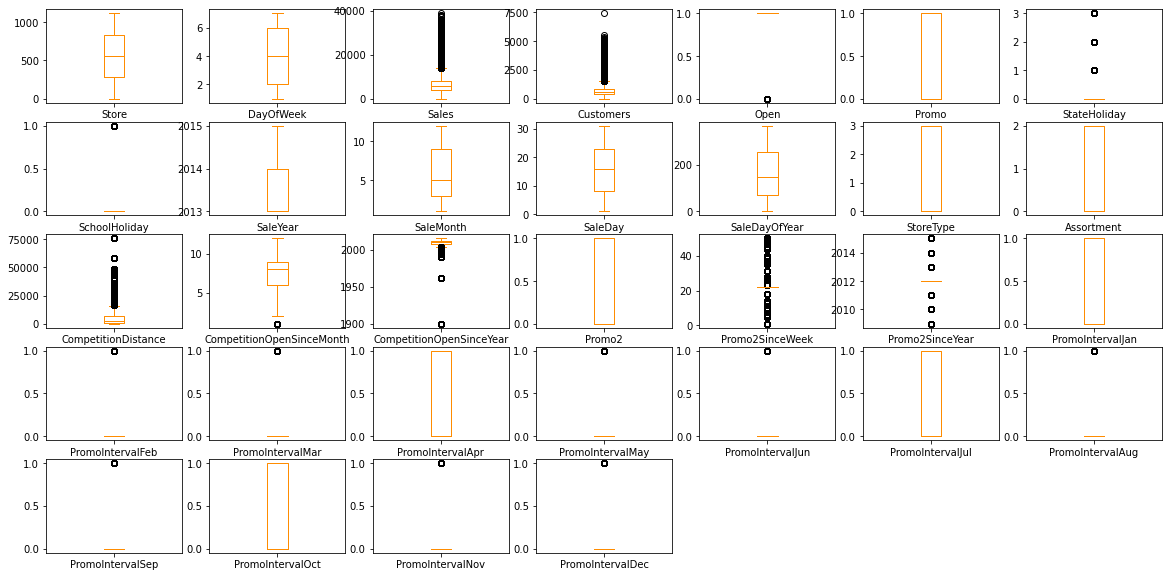

In [50]:
# Let us plot our features and see if there are any outliers worth studying
sales_merged_df.plot(kind='box', subplots=True, layout=(5,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

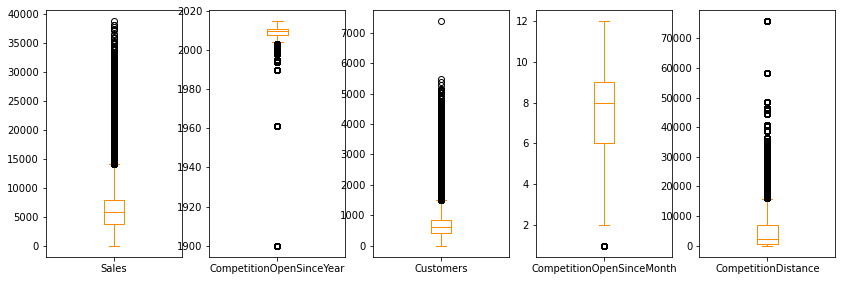

In [51]:
# We have a few columns that we need to focus on and see if they are really outliers
sales_merged_df[["Sales", "CompetitionOpenSinceYear", "Customers", "CompetitionOpenSinceMonth", "CompetitionDistance"]].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

In [52]:
# For the CompetitionOpenSinceMonth, we can just check if the outlier is just 1 and not 0, so this would be acceptable
sales_merged_df.CompetitionOpenSinceMonth.value_counts()

8.0     323378
9.0     102754
4.0      78428
11.0     75991
3.0      57108
7.0      53270
12.0     52008
10.0     50010
6.0      40844
5.0      35560
2.0      34114
1.0      11164
Name: CompetitionOpenSinceMonth, dtype: int64

In [53]:
# Let us place the rest of the columns that we'd like to check on a list.
check_features = ["CompetitionOpenSinceYear", "Customers", "CompetitionDistance", "Sales"]

In [54]:
# We have two functions that we can use to remove outliers. 
# The first one is the three sigma limits method and the second one is 
# the interquartile range multiplied by 1.5 method.

def outliers_three_sigma(data_frame, features):
    """
    Removes outliers on specific columns of a dataframe using the three sigma limits method.
    This basically removes all values that are 3 standard deviations away from the mean.
    """
    for feature in features.columns:
        feature_data = data_frame[feature]
        mean_val = np.mean(feature_data)
        std_val = np.std(feature_data)
        lower_limit = max(0, mean_val - 3*std_val)
        upper_limit = mean_val + 3*std_val
        print(f"Analyzing Feature: {feature}")
        print(f"     Mean: {mean_val:.2f}, Standard dev: {std_val:.2f} , Lower Limit: {lower_limit:.2f}, Upper Limit: {upper_limit:.2f}")
        data_frame = data_frame[data_frame[feature] >= lower_limit]
        data_frame = data_frame[data_frame[feature] <= upper_limit]
    return data_frame

def outliers_iqr(data_frame, features):
    """
    Removes outliers on specific columns of a dataframe using the interquartile range multiplied by 1.5.
    This basically removes all values that are outside the IQR*1.5 of the first and third quartile.
    """
    for feature in features.columns:
        feature_data = data_frame[feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        print(f"Analyzing Feature: {feature}")
        print(f"     Quartile 1: {Q1:.2f}, Quartile 3: {Q3:.2f}, Interquartile Range: {IQR:.2f}, Outlier Step: {outlier_step:.2f}")
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        data_frame.drop(outliers, inplace = True, errors = 'ignore')
    return data_frame

In [55]:
# Let us first check how our data will turn out if we use the three sigma method.
sales_merged_df_three_sigma = sales_merged_df.copy(deep=True)
sales_merged_df_three_sigma = outliers_three_sigma(sales_merged_df_three_sigma, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Mean: 2009.11, Standard dev: 4.97 , Lower Limit: 1994.20, Upper Limit: 2024.01
Analyzing Feature: Customers
     Mean: 633.77, Standard dev: 465.34 , Lower Limit: 0.00, Upper Limit: 2029.79
Analyzing Feature: CompetitionDistance
     Mean: 5508.23, Standard dev: 7769.09 , Lower Limit: 0.00, Upper Limit: 28815.50
Analyzing Feature: Sales
     Mean: 5597.48, Standard dev: 3592.65 , Lower Limit: 0.00, Upper Limit: 16375.44


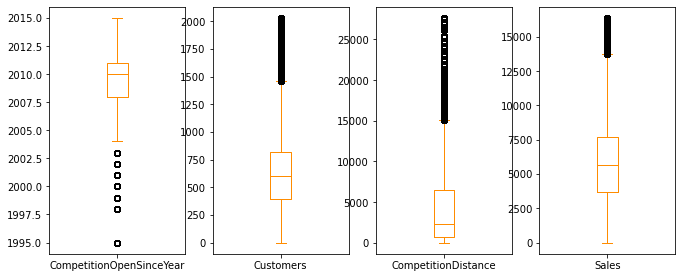

In [56]:
sales_merged_df_three_sigma[check_features].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

In [57]:
# Let us then check how our data will turn out if we use the IQR * 1.5 method.
sales_merged_df_iqr = sales_merged_df.copy(deep=True)
sales_merged_df_iqr = outliers_iqr(sales_merged_df_iqr, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Quartile 1: 2008.00, Quartile 3: 2011.00, Interquartile Range: 3.00, Outlier Step: 4.50
Analyzing Feature: Customers
     Quartile 1: 407.00, Quartile 3: 839.00, Interquartile Range: 432.00, Outlier Step: 648.00
Analyzing Feature: CompetitionDistance
     Quartile 1: 780.00, Quartile 3: 6890.00, Interquartile Range: 6110.00, Outlier Step: 9165.00
Analyzing Feature: Sales
     Quartile 1: 3625.00, Quartile 3: 7521.00, Interquartile Range: 3896.00, Outlier Step: 5844.00


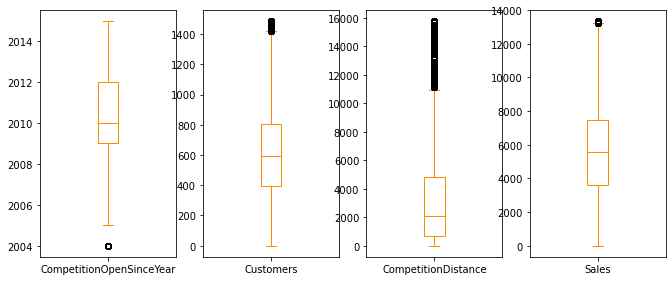

In [58]:
sales_merged_df_iqr[check_features].plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

In [59]:
# Let us compare the percentages of the dataset that will be left once we remove the outliers.
sales_merged_df_iqr.size/sales_merged_df.size*100, sales_merged_df_three_sigma.size/sales_merged_df.size*100

(78.85853171067177, 95.26026399775209)

In [60]:
# Since we have not yet taken into consideration the input of a business analyst or someone with
# domain knowledge on the dataset, let us just use the outlier detection method with the least amount
# of outliers just to be safe with our data.
sales_merged_df = outliers_three_sigma(sales_merged_df, sales_merged_df[check_features])

Analyzing Feature: CompetitionOpenSinceYear
     Mean: 2009.11, Standard dev: 4.97 , Lower Limit: 1994.20, Upper Limit: 2024.01
Analyzing Feature: Customers
     Mean: 633.77, Standard dev: 465.34 , Lower Limit: 0.00, Upper Limit: 2029.79
Analyzing Feature: CompetitionDistance
     Mean: 5508.23, Standard dev: 7769.09 , Lower Limit: 0.00, Upper Limit: 28815.50
Analyzing Feature: Sales
     Mean: 5597.48, Standard dev: 3592.65 , Lower Limit: 0.00, Upper Limit: 16375.44


In [61]:
# We now have 95% of the original dataset
sales_merged_df.size

27880896

## 4. Modelling
In this section, we will try to fit our data into various models and choose one that we can optimize to produce optimal accuracy.

#### 4.1 Separating between training and validation

In [62]:
sales_merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SaleYear,SaleMonth,...,PromoIntervalMar,PromoIntervalApr,PromoIntervalMay,PromoIntervalJun,PromoIntervalJul,PromoIntervalAug,PromoIntervalSep,PromoIntervalOct,PromoIntervalNov,PromoIntervalDec
0,1115,2,0,0,0,0,1,1,2013,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,379,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,377,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,376,2,0,0,0,0,1,1,2013,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914623,745,4,10782,942,1,1,0,0,2015,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914624,746,4,9469,748,1,1,0,0,2015,4,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
914626,748,4,9524,746,1,1,0,0,2015,4,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
914627,742,4,12225,1196,1,1,0,0,2015,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# We can try splitting training and validation via year
sales_merged_df.SaleYear.value_counts()

2013    388057
2014    355403
2015    127818
Name: SaleYear, dtype: int64

In [64]:
# So, if we use the data from 2013 and 2014, we end up with 85.29% of our data as our training 
# and the rest which is for 2015 as our validation dataset.
(388057 + 355043) / 871278 * 100

85.28850722731435

In [65]:
# Split data into training and validation
df_val = sales_merged_df[sales_merged_df.SaleYear == 2015]
df_train = sales_merged_df[sales_merged_df.SaleYear != 2015]

len(df_val), len(df_train)

(127818, 743460)

In [66]:
# Split data into X & y
X_train, y_train = df_train.drop("Sales", axis=1), df_train.Sales
X_valid, y_valid = df_val.drop("Sales", axis=1), df_val.Sales

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((743460, 31), (743460,), (127818, 31), (127818,))

In [67]:
df_val.to_csv("data/validation.csv")

#### 4.2 Evaluation Function

There are more than a few ways to evaluate a regression problem, but for this problem we can make do of the below:
* MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
* MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.
* RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
* R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

Source: https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html

In [68]:
# Create function to evaluate our model
from sklearn.metrics import mean_squared_error, mean_absolute_error

model_accuracies = []

def show_scores(estimator, model):
    """
    Displays the MAE, RMSE and R-squared of both training and validation.
    This function also appends each result to the model_accuracies list for better comparison.
    """
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Estimator": estimator,
              "Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
              "Valid RMSE": np.sqrt(mean_squared_error(y_valid, val_preds)),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    model_accuracies.append(list(scores.values()))
    return scores

#### 4.3 Estimators
We are going to try and use more than 1 model/estimator and fit our data with their default parameters and see which ones would produce a more accurate value. For the `RandomForestRegressor`, we have an option to set the maximum number of samples so we will use that to lessen the amount of processing time.

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create a dictionary containing multiple models/estimators
dict_regressors = {
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "ElasticNet": ElasticNet(random_state=42),
    "LinearBayesianRidge": linear_model.BayesianRidge(),
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)} 

# Re-initialize the model_accuracies list
model_accuracies = []

In [70]:
%%time
# Loop through the regression model dictionary, fit to our training data and score the models.
for model, model_instantiation in dict_regressors.items():
    current_model = model_instantiation
    current_model.fit(X_train, y_train)
    show_scores(model, current_model)

CPU times: total: 5min 21s
Wall time: 3min 1s


In [71]:
# Let us convery our model_accuracies list into a DataFrame for better readability
model_accuracies_df = pd.DataFrame (model_accuracies, columns = ['Estimator', 'Training MAE', 'Valid MAE', "Training RMSE", "Valid RMSE", "TrainingR^2", "ValidR^2"])
model_accuracies_df

,Estimator,Training MAE,Valid MAE,Training RMSE,Valid RMSE,TrainingR^2,ValidR^2
0,GradientBoostingRegressor,621.526969,646.191632,867.443680,917.094263,0.937831,0.930204
1,ElasticNet,890.032279,921.517618,1235.419808,1289.533631,0.873897,0.862003
2,LinearBayesianRidge,847.364490,851.449988,1164.614338,1184.581484,0.887938,0.883551
3,LinearRegression,847.367452,851.450242,1164.614335,1184.577635,0.887938,0.883552
4,RandomForestRegressor,494.022490,525.218697,736.846054,791.106196,0.955141,0.948063


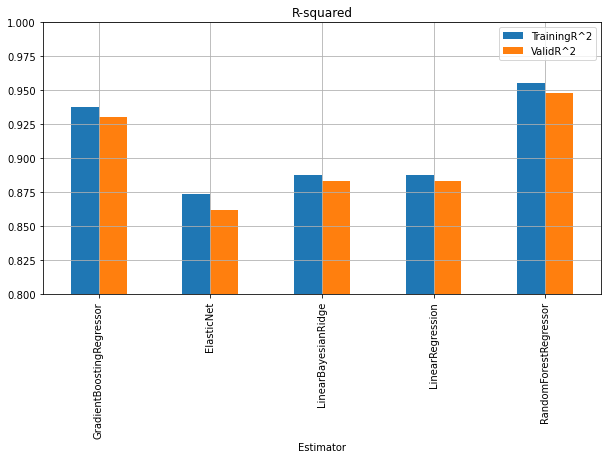

In [72]:
model_accuracies_df.plot(title='R-squared', x='Estimator', y=['TrainingR^2', 'ValidR^2'], figsize=(10,5), grid=True, kind='bar', ylim=(0.8,1));

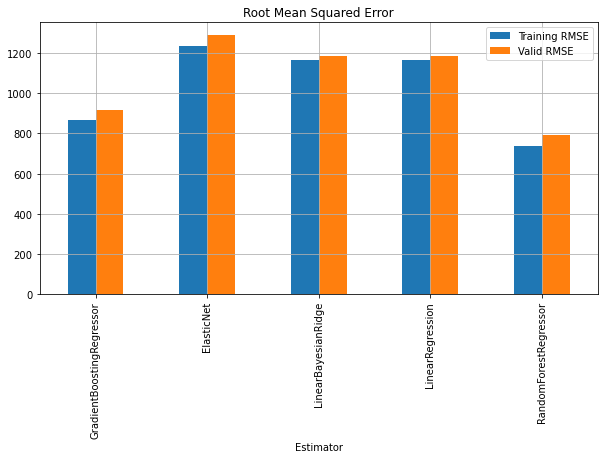

In [73]:
model_accuracies_df.plot(title='Root Mean Squared Error', x='Estimator', y=['Training RMSE', 'Valid RMSE'], figsize=(10,5), grid=True, kind='bar');

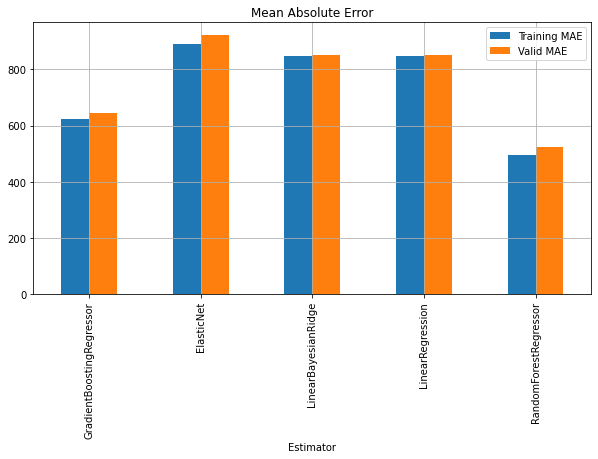

In [74]:
model_accuracies_df.plot(title='Mean Absolute Error', x='Estimator', y=['Training MAE', 'Valid MAE'], figsize=(10,5), grid=True, kind='bar');

Based on the results above, we can now see that the RandomForestRegressor (which only used 10000 samples) was better than the other models in our dictionary.

#### 4.4 Hyperparameter Tuning
Now that we have a model that produced better accuracy than others, let us focus on tuning the hyperparameters of this particular model.

In [75]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 200, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,30,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state = 42),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              random_state = 42,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 4min 5s
Wall time: 3min 41s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=42, verbose=True)

In [76]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [77]:
# Evaluate the RandomizedSearch model
show_scores("RandomForest - Best Params", rs_model)

{'Estimator': 'RandomForest - Best Params',
 'Training MAE': 565.4563637088149,
 'Valid MAE': 587.9769346508161,
 'Training RMSE': 841.7796902070343,
 'Valid RMSE': 883.3830734338482,
 'Training R^2': 0.9414547538715671,
 'Valid R^2': 0.9352404596572942}

As we can, see our accuracy has improved from the previous random forest model in our first comparison. The next step would be to create a model with all the samples that we've got.

In [78]:
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=7,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_depth=None,
                                    random_state=42) 

In [79]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=7, min_samples_split=8,
                      n_estimators=60, n_jobs=-1, random_state=42)

In [80]:
# Evaluate the ideal model which was trained on all samples.
show_scores("RandomForest - Best Params (All Training)", ideal_model)

{'Estimator': 'RandomForest - Best Params (All Training)',
 'Training MAE': 218.5969824746789,
 'Valid MAE': 302.59519195370825,
 'Training RMSE': 350.891214668585,
 'Valid RMSE': 483.65515978975253,
 'Training R^2': 0.9898272179628735,
 'Valid R^2': 0.9805876880689377}

As we can, see our accuracy has improved from the previous random forest model, this could probably because we now have more training dataset.

#### 4.5 Finalize the Model
The next step would be to train our model using both validation and training dataset so that we could have more accuracy in our other predictions.

In [81]:
# Split all the data into X & y
X_train, y_train = sales_merged_df.drop("Sales", axis=1), sales_merged_df.Sales

# Fit it to our ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=7, min_samples_split=8,
                      n_estimators=60, n_jobs=-1, random_state=42)

In [82]:
# Evaluate the ideal model on all data values
show_scores("RandomForest - Best Params (All Data)", ideal_model)

{'Estimator': 'RandomForest - Best Params (All Data)',
 'Training MAE': 215.20580226835963,
 'Valid MAE': 217.8182723998576,
 'Training RMSE': 342.9493235690393,
 'Valid RMSE': 347.91559821777076,
 'Training R^2': 0.9902779708200616,
 'Valid R^2': 0.9899549197490412}

#### 4.6 Export 
Let us now export our model into a pickle file so it can be used easily.

In [83]:
# Export the model into a pickle file
import pickle

pickle.dump(ideal_model, open("sales_prediction.pkl", "wb"))

In [84]:
# Import back the exported model and test for accuracy just to double check
loaded_model = pickle.load(open("sales_prediction.pkl", "rb"))
# Evaluate the Loaded model on all Data values
show_scores("Loaded Model", loaded_model)

{'Estimator': 'Loaded Model',
 'Training MAE': 215.20580226835963,
 'Valid MAE': 217.8182723998576,
 'Training RMSE': 342.9493235690393,
 'Valid RMSE': 347.9155982177707,
 'Training R^2': 0.9902779708200616,
 'Valid R^2': 0.9899549197490412}

_End of model creation_

#### 4.7 File Size Issue
Due to the limited storage of my GitHub account, I need to create a model with a smaller file size. What I will be doing is to use the optimal hyperparamaters of our `RandomForestRegressor` but with lesser data this time.

In [85]:
ideal_model_small = RandomForestRegressor(n_estimators=60,
                                    min_samples_leaf=7,
                                    min_samples_split=8,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_depth=None,
                                    random_state=42,
                                    max_samples=1000) 

In [86]:
# Fit it to our ideal model
ideal_model_small.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, max_samples=1000, min_samples_leaf=7,
                      min_samples_split=8, n_estimators=60, n_jobs=-1,
                      random_state=42)

In [87]:
show_scores("Small Model", ideal_model_small)

{'Estimator': 'Small Model',
 'Training MAE': 695.0598885590132,
 'Valid MAE': 704.4561137673379,
 'Training RMSE': 1034.1867046109583,
 'Valid RMSE': 1053.0709206429615,
 'Training R^2': 0.9115913173134005,
 'Valid R^2': 0.9079718161633875}

In [88]:
pickle.dump(ideal_model_small, open("sales_prediction_small.pkl", "wb"))

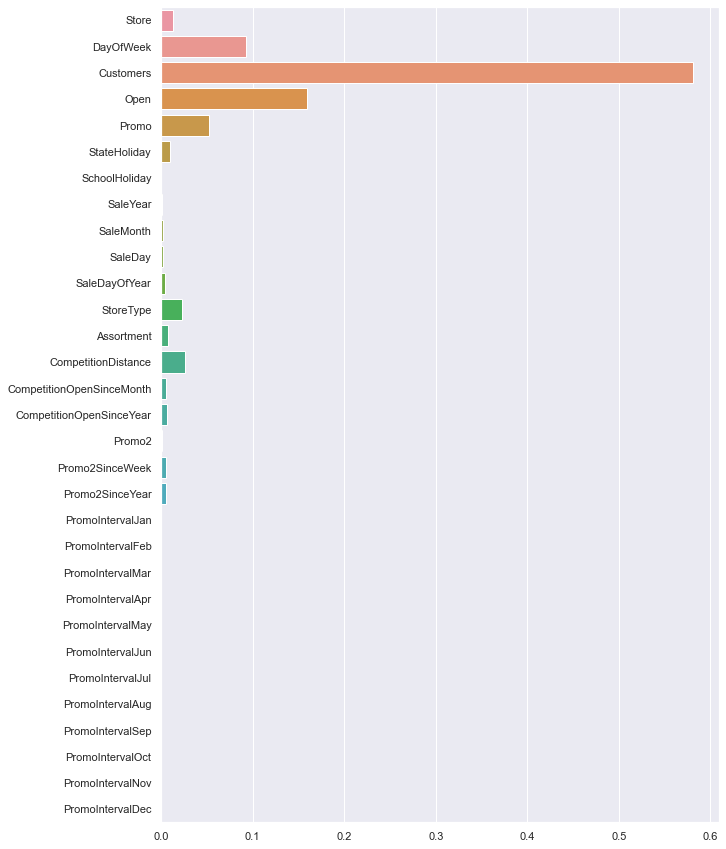

In [97]:
# Get the di
sns.set(rc={"figure.figsize":(10,15)}) #width=3, #height=4
sns.barplot(x= ideal_model.feature_importances_, y=X_train.columns);